In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from pprint import pprint
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import statsmodels.api as sm
from IPython.display import display
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
!unzip "/content/archive (9).zip"

Archive:  /content/archive (9).zip
  inflating: city_attributes.csv     
  inflating: humidity.csv            
  inflating: pressure.csv            
  inflating: temperature.csv         
  inflating: weather_description.csv  
  inflating: wind_direction.csv      
  inflating: wind_speed.csv          


In [ ]:
data_temp = pd.read_csv('/content/temperature.csv')
data_temp

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,NaN,282.000000,NaN,280.820000,293.550000,292.150000,289.540000,294.710000,285.720000,...,290.240000,NaN,275.130000,288.080000,NaN,NaN,NaN,NaN,NaN,NaN
45249,2017-11-29 21:00:00,NaN,282.890000,NaN,281.650000,295.680000,292.740000,290.610000,295.590000,286.450000,...,289.240000,NaN,274.130000,286.020000,NaN,NaN,NaN,NaN,NaN,NaN
45250,2017-11-29 22:00:00,NaN,283.390000,NaN,282.750000,295.960000,292.580000,291.340000,296.250000,286.440000,...,286.780000,NaN,273.480000,283.940000,NaN,NaN,NaN,NaN,NaN,NaN
45251,2017-11-29 23:00:00,NaN,283.020000,NaN,282.960000,295.650000,292.610000,292.150000,297.150000,286.140000,...,284.570000,NaN,272.480000,282.170000,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_hum = pd.read_csv('/content/humidity.csv')
data_hum

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN
1,2012-10-01 13:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,...,71.0,58.0,93.0,68.0,50.0,63.0,22.0,51.0,51.0,50.0
2,2012-10-01 14:00:00,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,...,70.0,57.0,91.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
3,2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,...,70.0,57.0,87.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
4,2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,...,69.0,57.0,84.0,68.0,52.0,62.0,22.0,51.0,51.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,NaN,81.0,NaN,93.0,24.0,72.0,18.0,68.0,37.0,...,27.0,NaN,64.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN
45249,2017-11-29 21:00:00,NaN,71.0,NaN,87.0,21.0,72.0,18.0,73.0,34.0,...,29.0,NaN,59.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN
45250,2017-11-29 22:00:00,NaN,71.0,NaN,93.0,23.0,68.0,17.0,60.0,32.0,...,31.0,NaN,66.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN
45251,2017-11-29 23:00:00,NaN,71.0,NaN,87.0,14.0,63.0,17.0,33.0,30.0,...,26.0,NaN,58.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_hum = pd.read_csv('/content/city_attributes.csv')
data_hum

,City,Country,Latitude,Longitude
0,Vancouver,Canada,49.249660,-123.119339
1,Portland,United States,45.523449,-122.676208
2,San Francisco,United States,37.774929,-122.419418
3,Seattle,United States,47.606209,-122.332069
4,Los Angeles,United States,34.052231,-118.243683
5,San Diego,United States,32.715328,-117.157257
6,Las Vegas,United States,36.174969,-115.137222
7,Phoenix,United States,33.448380,-112.074043
8,Albuquerque,United States,35.084492,-106.651138
9,Denver,United States,39.739151,-104.984703


In [ ]:
data_hum['Miami'].describe()

count    44166.000000
mean        75.512362
std         14.489543
min         12.000000
25%         65.000000
50%         77.000000
75%         88.000000
max        100.000000
Name: Miami, dtype: float64

<ipython-input-1-9220bcb6a3a0>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[cities_of_interest] = filtered_data[cities_of_interest]


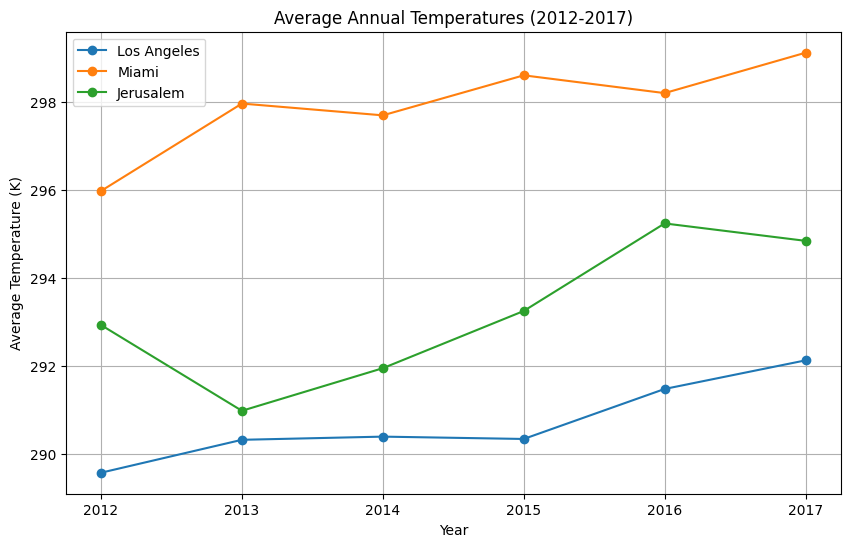

In [ ]:

temperature_data = pd.read_csv('/content/temperature.csv')


temperature_data['datetime'] = pd.to_datetime(temperature_data['datetime'])
temperature_data['year'] = temperature_data['datetime'].dt.year

cities_of_interest = ['Los Angeles', 'Miami', 'Jerusalem']
filtered_data = temperature_data[['year'] + cities_of_interest]

filtered_data[cities_of_interest] = filtered_data[cities_of_interest]

annual_avg_temperatures = filtered_data.groupby('year').mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(annual_avg_temperatures['year'], annual_avg_temperatures['Los Angeles'], marker='o', label='Los Angeles')
plt.plot(annual_avg_temperatures['year'], annual_avg_temperatures['Miami'], marker='o', label='Miami')
plt.plot(annual_avg_temperatures['year'], annual_avg_temperatures['Jerusalem'], marker='o', label='Jerusalem')

plt.title('Average Annual Temperatures (2012-2017)')
plt.xlabel('Year')
plt.ylabel('Average Temperature (K)')
plt.legend()
plt.grid(True)
plt.show()


# Finding 30 Day Rolling Averages for Each of the Cities

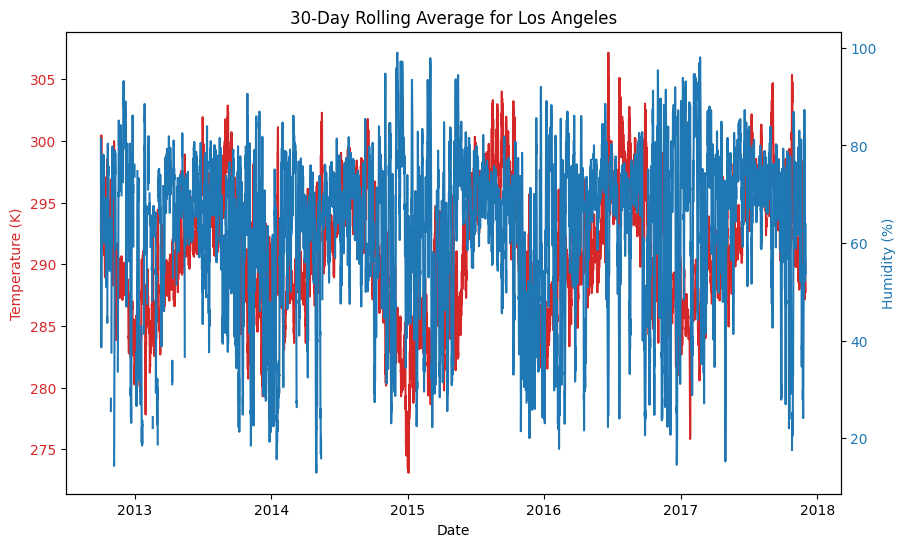

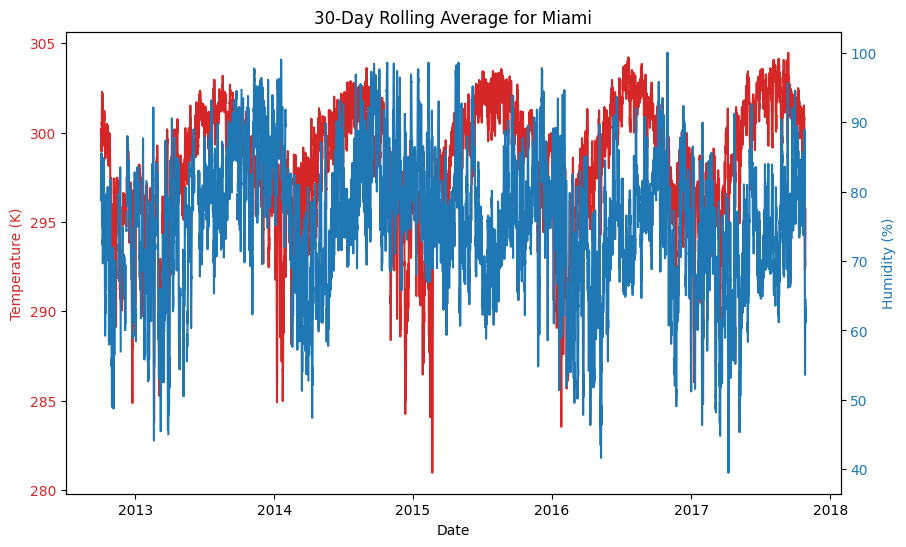

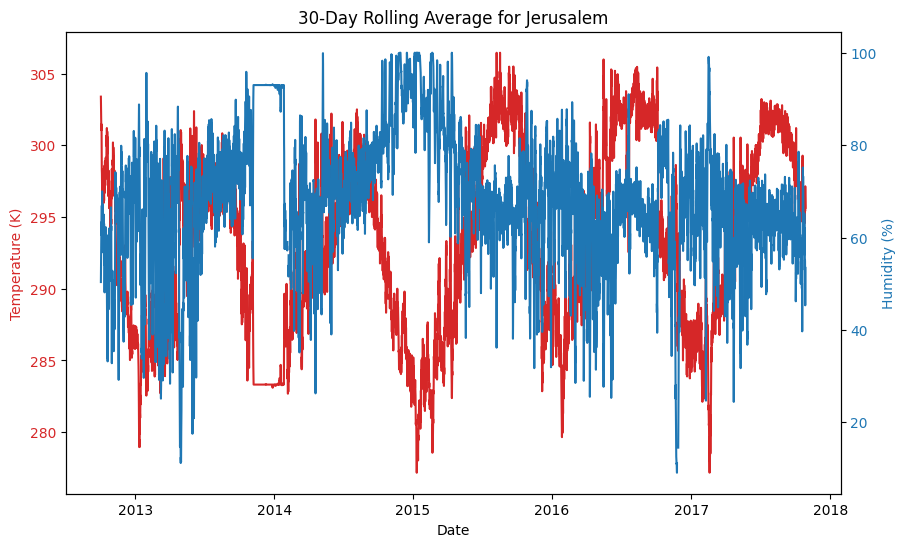

In [ ]:

temperature_data = pd.read_csv('/content/temperature.csv')
humidity_data = pd.read_csv('/content/humidity.csv')

temperature_data['datetime'] = pd.to_datetime(temperature_data['datetime'])
humidity_data['datetime'] = pd.to_datetime(humidity_data['datetime'])


def plot_rolling_average(city_name, temp_data, hum_data):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    temp_rolling = temp_data[city_name].rolling(window=30).mean()

    color = 'tab:red'
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Temperature (K)', color=color)
    ax1.plot(temp_data['datetime'], temp_rolling, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    hum_rolling = hum_data[city_name].rolling(window=30).mean()

    color = 'tab:blue'
    ax2.set_ylabel('Humidity (%)', color=color)
    ax2.plot(hum_data['datetime'], hum_rolling, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    plt.title(f'30-Day Rolling Average for {city_name}')
    plt.show()

plot_rolling_average('Los Angeles', temperature_data, humidity_data)
plot_rolling_average('Miami', temperature_data, humidity_data)
plot_rolling_average('Jerusalem', temperature_data, humidity_data)


#Geographical Information

<ipython-input-9-6096f06a6234>:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  us_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


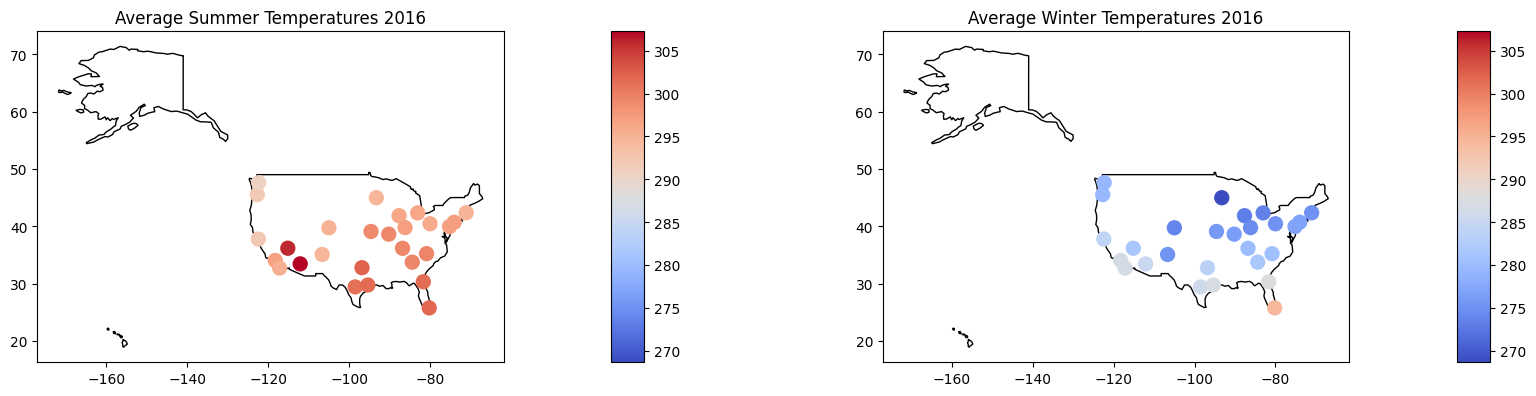

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load the U.S. map
us_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
us_map = us_map[us_map.name == "United States of America"]

# Load city attributes to get latitude and longitude for U.S. cities
city_attributes = pd.read_csv('/content/city_attributes.csv')
city_attributes = city_attributes[city_attributes['Country'] == 'United States']

# Load temperature data
temperature_data = pd.read_csv('/content/temperature.csv')
temperature_data['datetime'] = pd.to_datetime(temperature_data['datetime'])
temperature_data.set_index('datetime', inplace=True)

# Calculate average temperature for summer (June, July, August) and winter (December, January, February) for the year 2016
summer_temps = temperature_data.loc['2016-06-01':'2016-08-31'].mean()
winter_temps = temperature_data.loc['2015-12-01':'2016-02-29'].mean()

# Filter for U.S. mainland cities
us_temperature_data = temperature_data[list(city_attributes['City'])]

# Normalize temperatures for plotting
norm = plt.Normalize(vmin=min(summer_temps.min(), winter_temps.min()), vmax=max(summer_temps.max(), winter_temps.max()))

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
divider1 = make_axes_locatable(ax1)
divider2 = make_axes_locatable(ax2)
cax1 = divider1.append_axes("right", size="5%", pad=0.1)
cax2 = divider2.append_axes("right", size="5%", pad=0.1)

us_map.plot(ax=ax1, color='white', edgecolor='black')
sc1 = ax1.scatter(city_attributes['Longitude'], city_attributes['Latitude'], s=100, c=summer_temps[list(city_attributes['City'])], cmap='coolwarm', norm=norm)
fig.colorbar(sc1, cax=cax1, orientation='vertical')
ax1.set_title('Average Summer Temperatures 2016')

us_map.plot(ax=ax2, color='white', edgecolor='black')
sc2 = ax2.scatter(city_attributes['Longitude'], city_attributes['Latitude'], s=100, c=winter_temps[list(city_attributes['City'])], cmap='coolwarm', norm=norm)
fig.colorbar(sc2, cax=cax2, orientation='vertical')
ax2.set_title('Average Winter Temperatures 2016')

plt.show()


# Time Series Analysis - For Los  Angeles

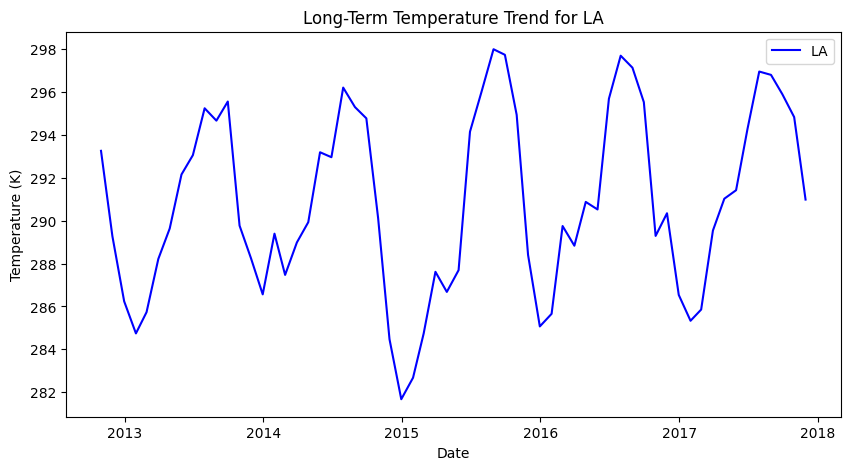

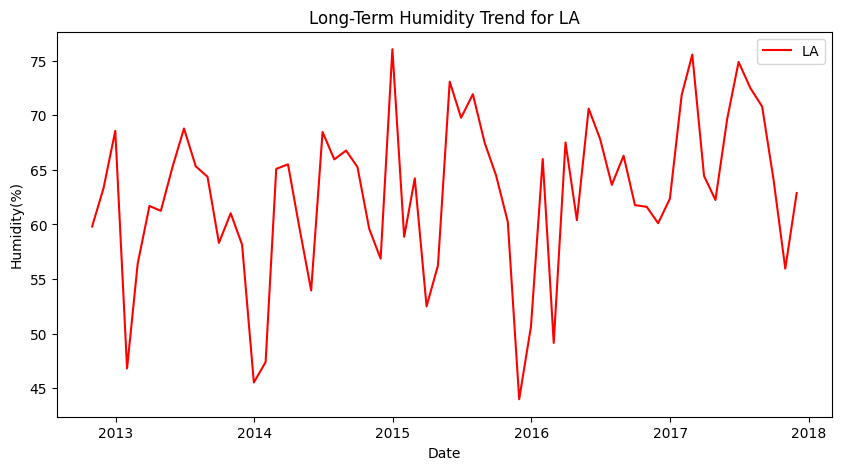

In [ ]:



data = pd.read_csv('/content/temperature.csv')
data['datetime'] = pd.to_datetime(data['datetime'])
data.set_index('datetime', inplace=True)


la_data = data['Los Angeles'].dropna().resample('M').mean()

plt.figure(figsize=(10, 5))
plt.plot(la_data, label='LA', color='blue')
plt.title('Long-Term Temperature Trend for LA')
plt.xlabel('Date')
plt.ylabel('Temperature (K)')
plt.legend()
plt.show()


data2 = pd.read_csv('/content/humidity.csv')
data2['datetime'] = pd.to_datetime(data2['datetime'])
data2.set_index('datetime', inplace=True)

la_data2 = data2['Los Angeles'].dropna().resample('M').mean()

plt.figure(figsize=(10, 5))
plt.plot(la_data2, label='LA', color='red')
plt.title('Long-Term Humidity Trend for LA')
plt.xlabel('Date')
plt.ylabel('Humidity(%)')
plt.legend()
plt.show()






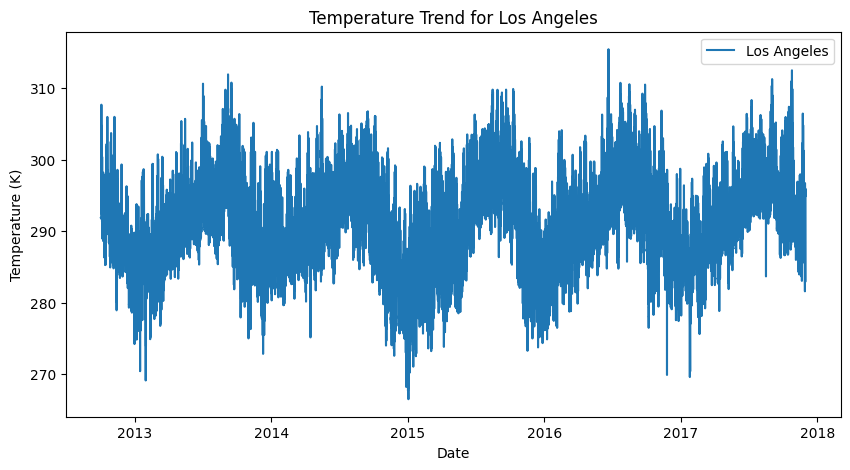

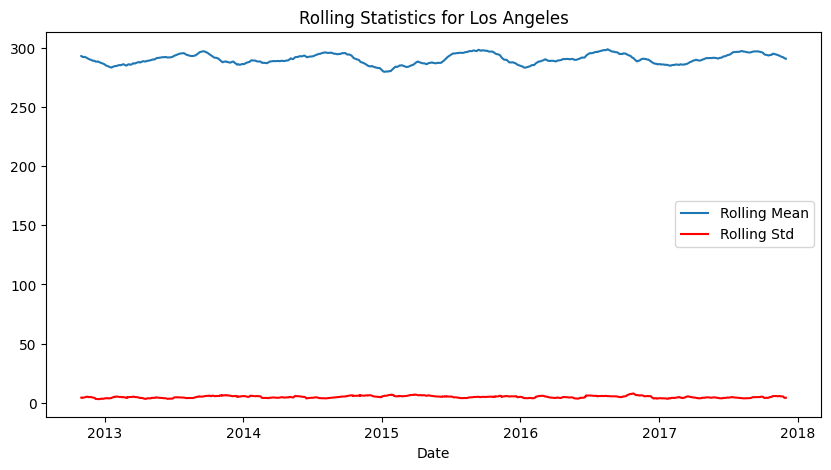

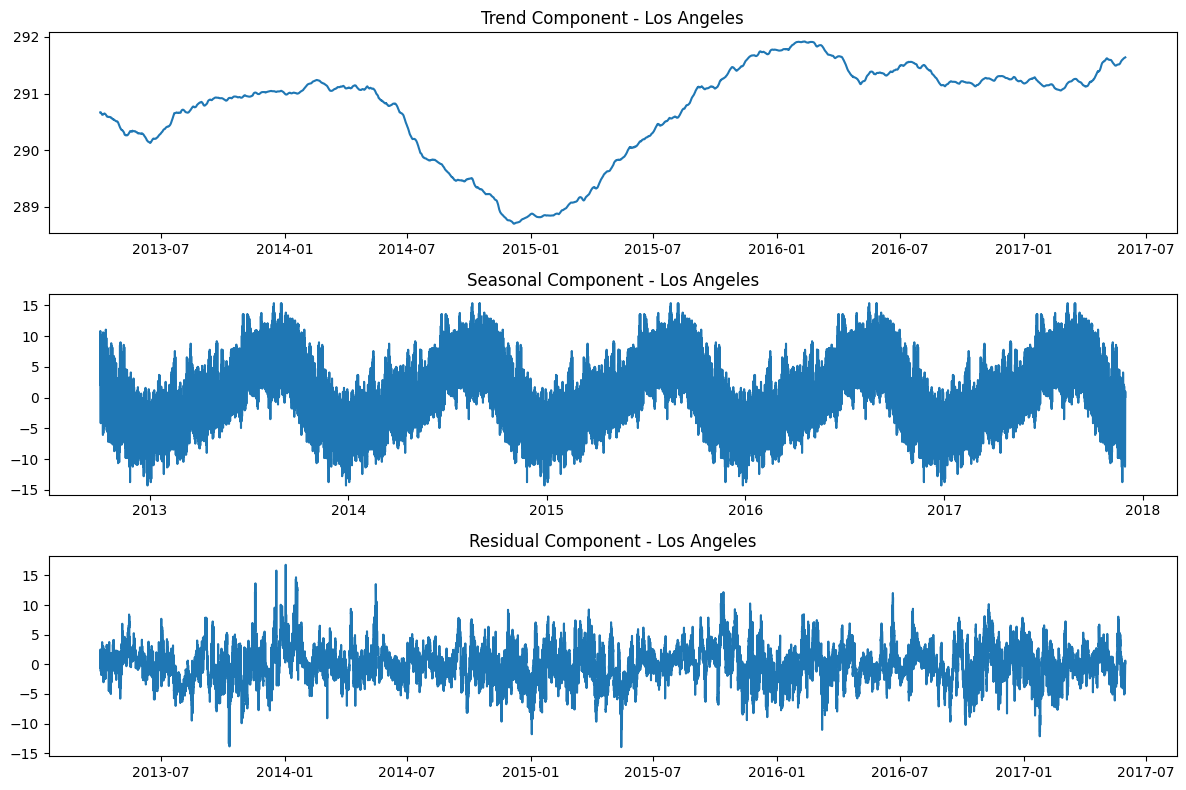

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the data and preprocess
data = pd.read_csv('temperature.csv')
data['datetime'] = pd.to_datetime(data['datetime'])
data.set_index('datetime', inplace=True)

# Filtering data for Los Angeles and handling missing values
la_data = data['Los Angeles'].dropna()  #change city to Miami and Jerusalem

# Temperature trend plot for Los Angeles
plt.figure(figsize=(10, 5))
plt.plot(la_data, label='Los Angeles')
plt.title('Temperature Trend for Los Angeles')
plt.xlabel('Date')
plt.ylabel('Temperature (K)')
plt.legend()
plt.show()

# Rolling mean and standard deviation
plt.figure(figsize=(10, 5))
plt.plot(la_data.rolling(window=720).mean(), label='Rolling Mean')
plt.plot(la_data.rolling(window=720).std(), label='Rolling Std', color='red')
plt.title('Rolling Statistics for Los Angeles')
plt.xlabel('Date')
plt.legend()
plt.show()

# Seasonal decomposition
result_la = seasonal_decompose(la_data, model='additive', period=24*365)
plt.figure(figsize=(12, 8))
plt.subplot(311)
plt.plot(result_la.trend)
plt.title('Trend Component - Los Angeles')
plt.subplot(312)
plt.plot(result_la.seasonal)
plt.title('Seasonal Component - Los Angeles')
plt.subplot(313)
plt.plot(result_la.resid)
plt.title('Residual Component - Los Angeles')
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Trend Component - Los Angeles')

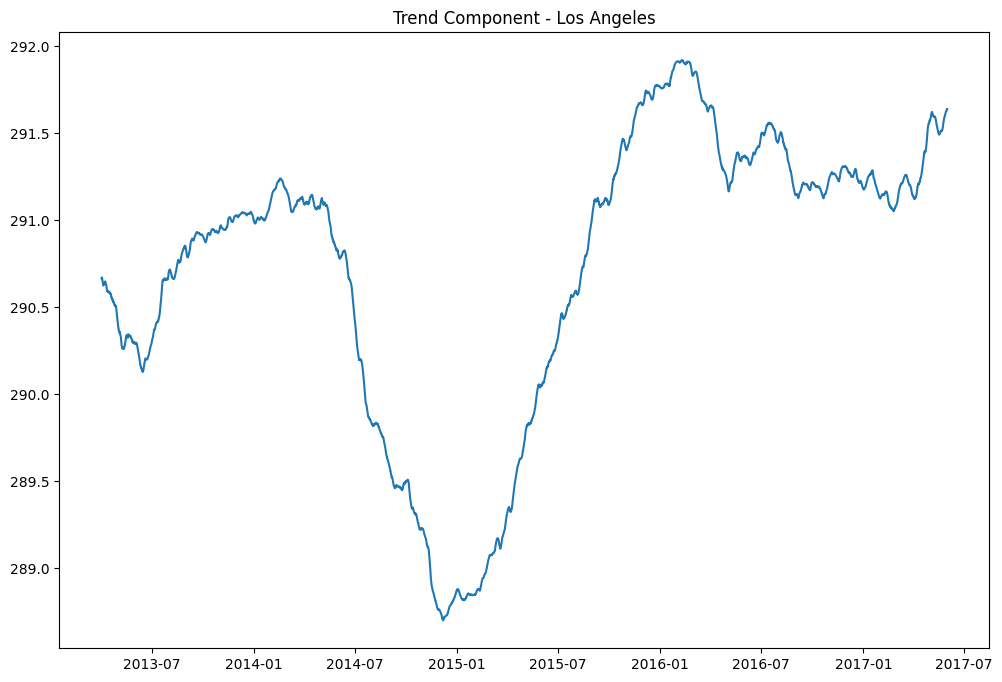

In [ ]:
result_la = seasonal_decompose(la_data, model='additive', period=24*365)
plt.figure(figsize=(12, 8))
plt.plot(result_la.trend)  #.trend for trend and .seasonal for seasonal
plt.title('Trend Component - Los Angeles')

Text(0.5, 1.0, 'Seasonal Component - Los Angeles')

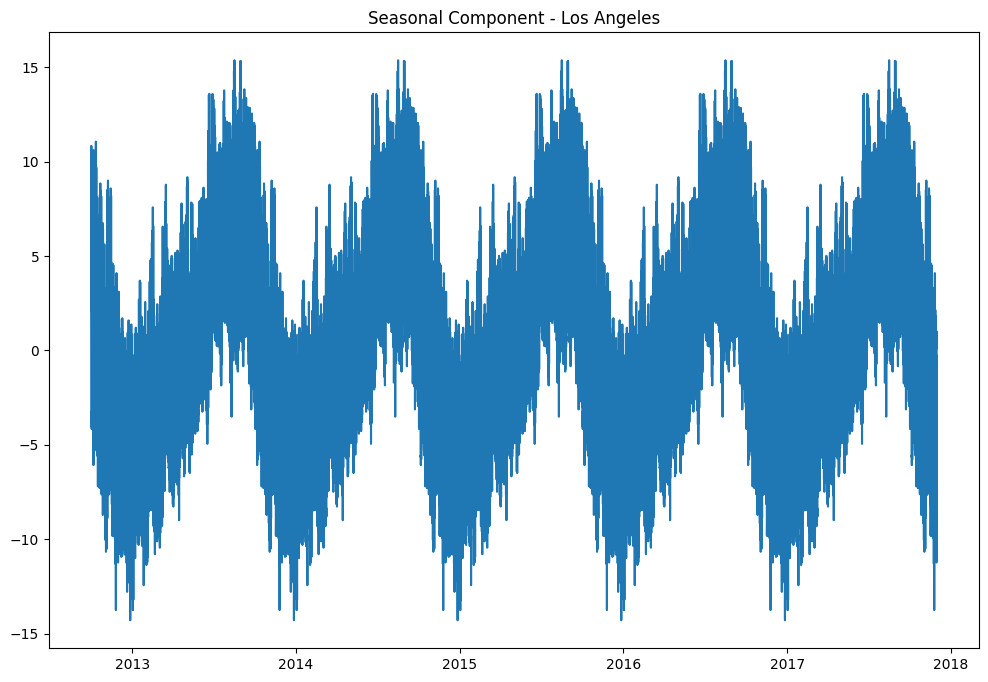

In [ ]:
result_la = seasonal_decompose(la_data, model='additive', period=24*365)
plt.figure(figsize=(12, 8))
plt.plot(result_la.seasonal)  #.trend for trend and .seasonal for seasonal
plt.title('Seasonal Component - Los Angeles')

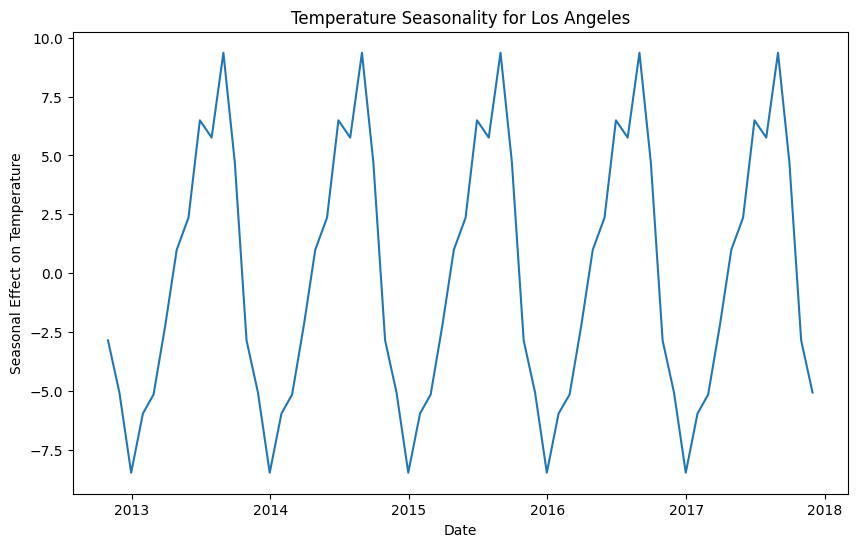

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

df = pd.read_csv('/content/temperature.csv')

# Preprocess the data
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)
df = df[['Los Angeles']]
df = df.fillna(method='bfill')
df = df.resample('M').bfill()

# Decomposing
result = seasonal_decompose(df['Los Angeles'], model='additive', extrapolate_trend='freq')
seasonal = result.seasonal

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(seasonal)
plt.title('Temperature Seasonality for Los Angeles')
plt.xlabel('Date')
plt.ylabel('Seasonal Effect on Temperature')
plt.show()


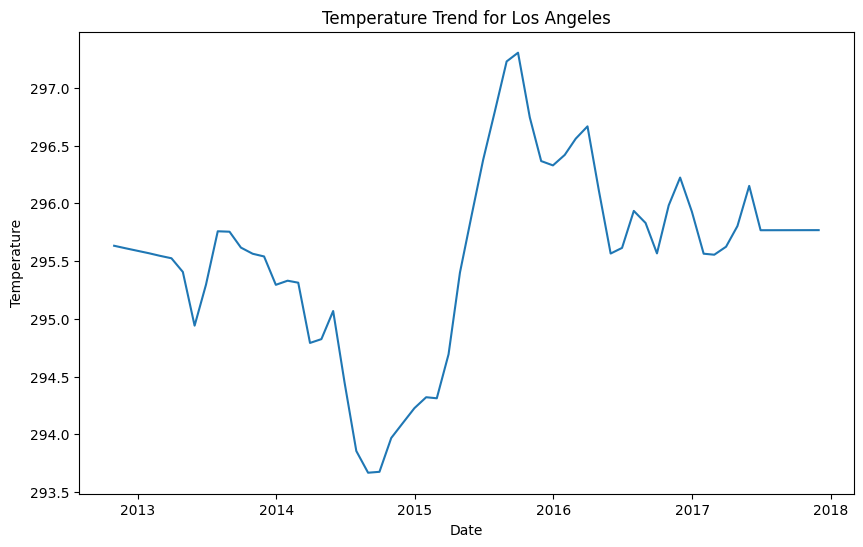

In [ ]:
# Plotting the trend component
plt.figure(figsize=(10, 6))
plt.plot(trend)
plt.title('Temperature Trend for Los Angeles')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()


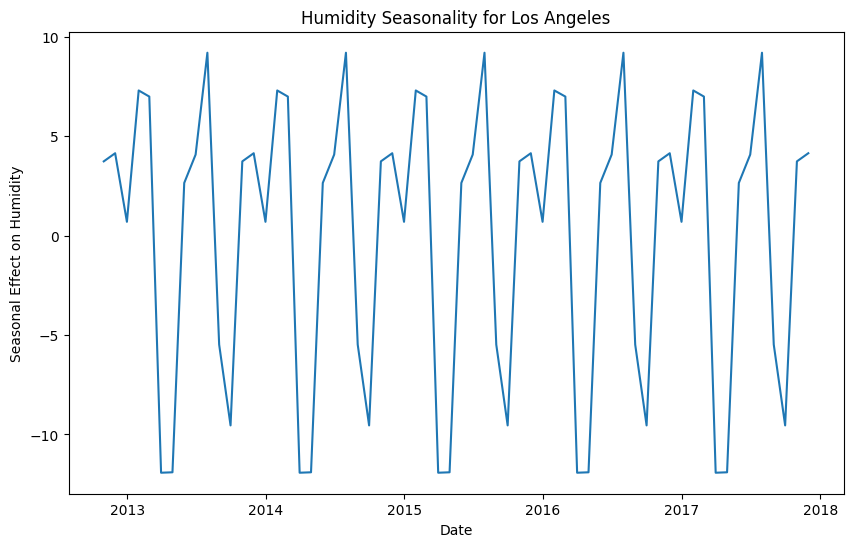

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


df = pd.read_csv('/content/humidity.csv')

# Preprocess the data
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)
df = df[['Los Angeles']]
df = df.fillna(method='bfill')
df = df.resample('M').bfill()

# Decomposing the series to extract seasonal component
result = seasonal_decompose(df['Los Angeles'], model='additive', extrapolate_trend='freq')
trend = result.trend
seasonal = result.seasonal

# Plotting the seasonal component
plt.figure(figsize=(10, 6))
plt.plot(seasonal)
plt.title('Humidity Seasonality for Los Angeles')
plt.xlabel('Date')
plt.ylabel('Seasonal Effect on Humidity')
plt.show()


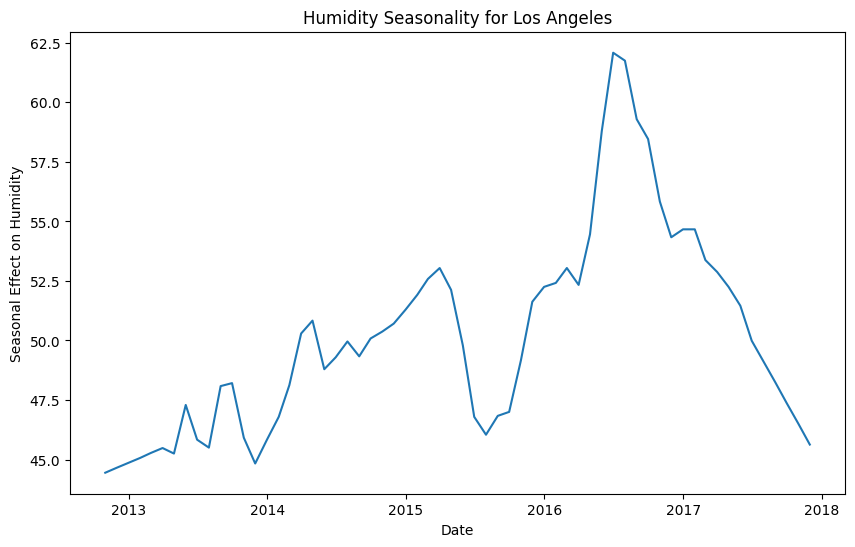

In [ ]:
# Plotting the trend component
plt.figure(figsize=(10, 6))
plt.plot(trend)
plt.title('Humidity Trend for Los Angeles')
plt.xlabel('Date')
plt.ylabel('Seasonal Effect on Humidity')
plt.show()

#Temperature Analysis

0.0016854026675770495
datetime
2012-10-01     0.001685
2012-10-02     0.626548
2012-10-03    14.125168
2012-10-04    -1.992657
2012-10-05    -4.762595
                ...    
2017-11-26    -1.599570
2017-11-27    -2.609275
2017-11-28    -4.497563
2017-11-29     3.274485
2017-11-30    -0.705749
Freq: D, Length: 1887, dtype: float64


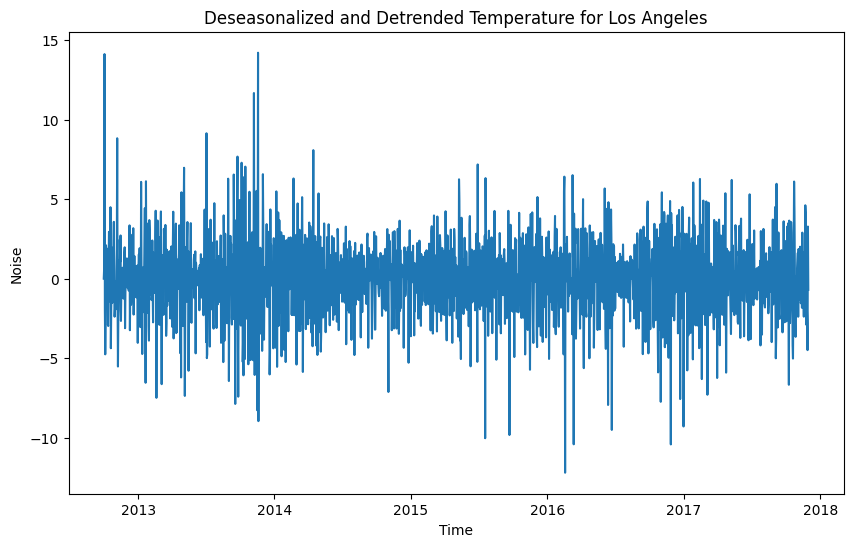

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

# brisbane_data = data[data['Location'] == 'Albury']
# lv = brisbane_data[['datetime', 'Las Vegas']]
df = pd.read_csv('/content/temperature.csv')
lv = df[['datetime', 'Los Angeles']]
lv = lv.fillna(method='bfill')
lv['datetime'] = pd.to_datetime(lv['datetime'])
lv.set_index('datetime', inplace=True)

lv = lv.resample('D').bfill()
# print(lv.isnull().sum())
# lv = lv.interpolate(method='linear')
# print(lv.isnull().sum())
# # print(lv)
# lv = lv.fillna()

result_add = seasonal_decompose(lv['Los Angeles'], model='additive', extrapolate_trend='freq')

trend = result_add.trend
seasonal = result_add.seasonal

# plt.plot(trend)
deseasonalized_detrended = lv['Los Angeles'] - trend - seasonal

# print(deseasonalized_detrended)

# sesonality remove karya pachi, haju quadratic trend che
# plt.plot(lv.index, deseasonalized_detrended)
# plt.show()

# double deffirenceing
# temp = deseasonalized_detrended[0]
deseasonalized_detrended = deseasonalized_detrended.diff()


mean_value = deseasonalized_detrended.mean()
deseasonalized_detrended = deseasonalized_detrended.fillna(mean_value)

# deseasonalized_detrended[0] = temp

print(deseasonalized_detrended.mean())

# temp2 = deseasonalized_detrended[0]
# deseasonalized_detrended = deseasonalized_detrended.diff()
# # deseasonalized_detrended[0] = temp2
# mean_value = deseasonalized_detrended.mean()
# deseasonalized_detrended = deseasonalized_detrended.fillna(mean_value)


# print(deseasonalized_detrended.mean())

# temp3 = deseasonalized_detrended[0]
# deseasonalized_detrended = deseasonalized_detrended.diff().bfill()
# deseasonalized_detrended[0] = temp3

# print(deseasonalized_detrended.mean())

# temp4 = deseasonalized_detrended[0]
# deseasonalized_detrended = deseasonalized_detrended.diff()
# deseasonalized_detrended[0] = temp4

# print(deseasonalized_detrended.mean())

# temp5 = deseasonalized_detrended[0]
# deseasonalized_detrended = deseasonalized_detrended.diff()
# deseasonalized_detrended[0] = temp5
# print(deseasonalized_detrended.mean())

print(deseasonalized_detrended)

plt.rcParams.update({'figure.figsize': (10,6)})
plt.plot(lv.index, deseasonalized_detrended)
plt.title('Deseasonalized and Detrended Temperature for Los Angeles')
plt.xlabel('Time')
plt.ylabel('Noise')
plt.show()


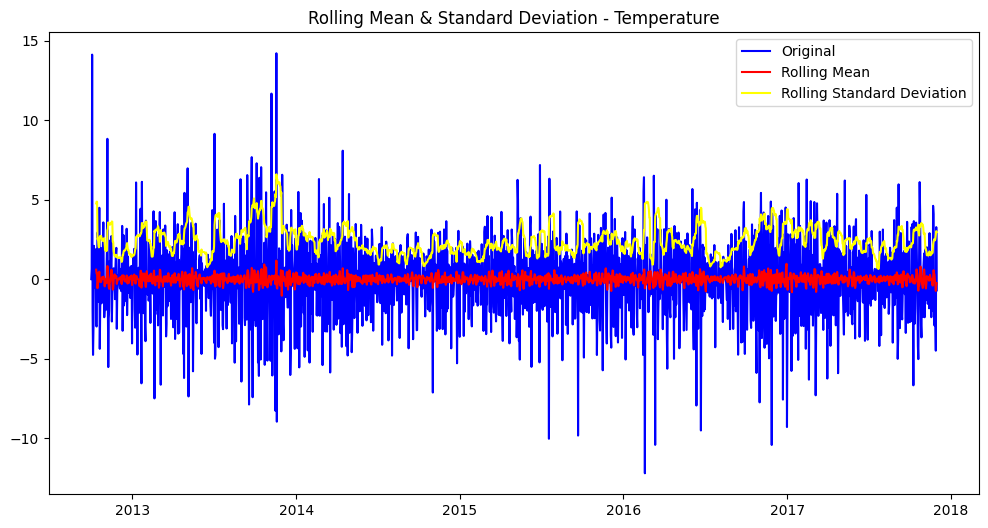

In [ ]:
# Calculate rolling statistics
rolmean = deseasonalized_detrended.rolling(window=12).mean()
rolstd = deseasonalized_detrended.rolling(window=12).std()

# Plot rolling statistics:
plt.figure(figsize=(12, 6))
orig = plt.plot(deseasonalized_detrended, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='yellow', label='Rolling Standard Deviation')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation - Temperature')
plt.show()


#Plotting ACF to map the appropriate function to it

<Figure size 1000x600 with 0 Axes>

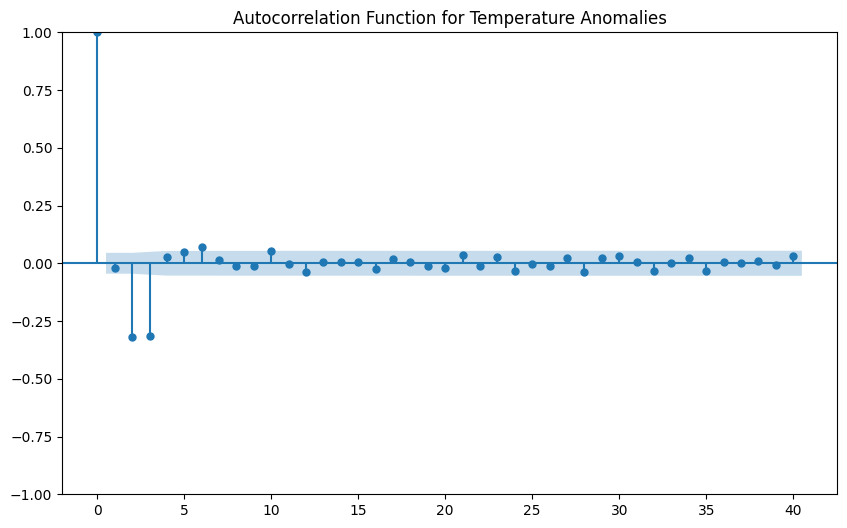

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

# Loading data
df = pd.read_csv('/content/temperature.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)
df = df[['Los Angeles']]
df = df.fillna(method='bfill')
df = df.resample('D').bfill()

# Seasonal decomposition
result_add = seasonal_decompose(df['Los Angeles'], model='additive', extrapolate_trend='freq')
trend = result_add.trend
seasonal = result_add.seasonal
residual = df['Los Angeles'] - trend - seasonal

# First differencing to stabilize the mean
residual = residual.diff().dropna()

# Plotting the Autocorrelation Function
plt.figure()
plot_acf(residual, lags=40)
plt.title('Autocorrelation Function for Temperature Anomalies')
plt.show()


# Humidity analysis

-0.006980844653166988
datetime
2012-10-01    -0.006981
2012-10-02     1.485091
2012-10-03   -61.454138
2012-10-04     4.333787
2012-10-05    20.088302
                ...    
2017-11-26     4.455656
2017-11-27    22.670507
2017-11-28   -39.530215
2017-11-29     1.979535
2017-11-30    27.639909
Freq: D, Length: 1887, dtype: float64


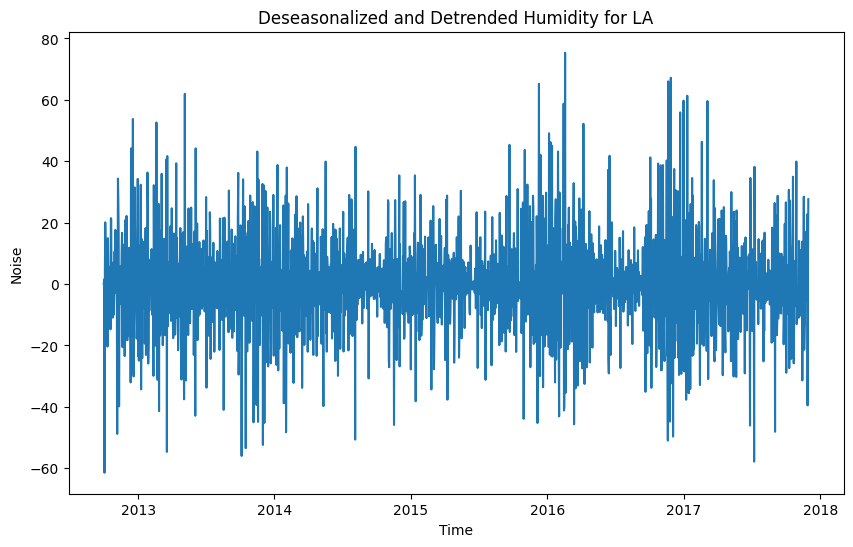

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

# brisbane_data = data[data['Location'] == 'Albury']
# lv = brisbane_data[['datetime', 'Las Vegas']]
df = pd.read_csv('/content/humidity.csv')
lv = df[['datetime', 'Los Angeles']]
lv = lv.fillna(method='bfill')
lv['datetime'] = pd.to_datetime(lv['datetime'])
lv.set_index('datetime', inplace=True)

lv = lv.resample('D').bfill()
# print(lv.isnull().sum())
# lv = lv.interpolate(method='linear')
# print(lv.isnull().sum())
# # print(lv)
# lv = lv.fillna()

result_add = seasonal_decompose(lv['Los Angeles'], model='additive', extrapolate_trend='freq')

trend = result_add.trend
seasonal = result_add.seasonal

# plt.plot(trend)
deseasonalized_detrended = lv['Los Angeles'] - trend - seasonal

# print(deseasonalized_detrended)

# sesonality remove karya pachi, haju quadratic trend che
# plt.plot(lv.index, deseasonalized_detrended)
# plt.show()

# double deffirenceing
# temp = deseasonalized_detrended[0]
deseasonalized_detrended = deseasonalized_detrended.diff()


mean_value = deseasonalized_detrended.mean()
deseasonalized_detrended = deseasonalized_detrended.fillna(mean_value)

# deseasonalized_detrended[0] = temp

print(deseasonalized_detrended.mean())

# temp2 = deseasonalized_detrended[0]
# deseasonalized_detrended = deseasonalized_detrended.diff()
# # deseasonalized_detrended[0] = temp2
# mean_value = deseasonalized_detrended.mean()
# deseasonalized_detrended = deseasonalized_detrended.fillna(mean_value)


# print(deseasonalized_detrended.mean())

# temp3 = deseasonalized_detrended[0]
# deseasonalized_detrended = deseasonalized_detrended.diff().bfill()
# deseasonalized_detrended[0] = temp3

# print(deseasonalized_detrended.mean())

# temp4 = deseasonalized_detrended[0]
# deseasonalized_detrended = deseasonalized_detrended.diff()
# deseasonalized_detrended[0] = temp4

# print(deseasonalized_detrended.mean())

# temp5 = deseasonalized_detrended[0]
# deseasonalized_detrended = deseasonalized_detrended.diff()
# deseasonalized_detrended[0] = temp5
# print(deseasonalized_detrended.mean())

print(deseasonalized_detrended)

plt.rcParams.update({'figure.figsize': (10,6)})
plt.plot(lv.index, deseasonalized_detrended)
plt.title('Deseasonalized and Detrended Humidity for LA')
plt.xlabel('Time')
plt.ylabel('Noise')
plt.show()


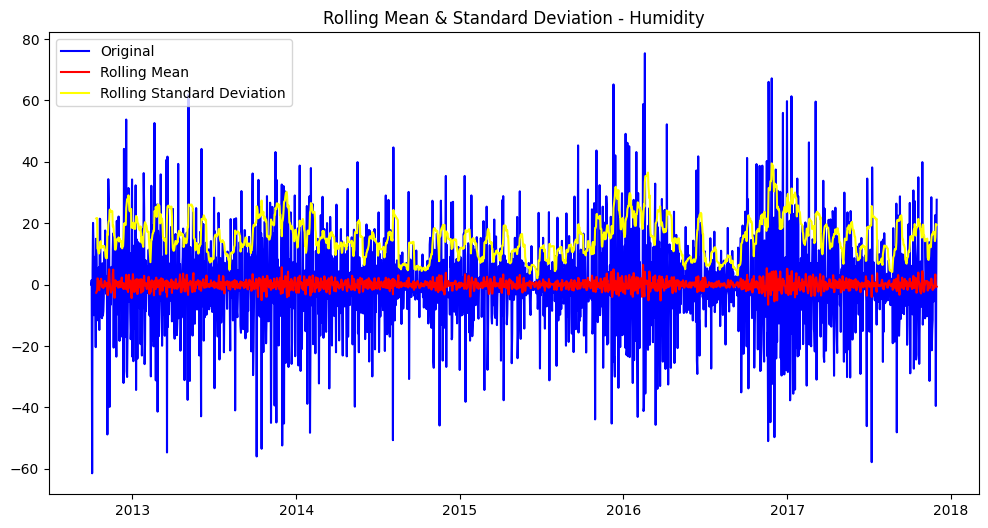

In [ ]:
# Calculate rolling statistics
rolmean = deseasonalized_detrended.rolling(window=12).mean()
rolstd = deseasonalized_detrended.rolling(window=12).std()

# Plot rolling statistics:
plt.figure(figsize=(12, 6))
orig = plt.plot(deseasonalized_detrended, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='yellow', label='Rolling Standard Deviation')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation - Humidity')
plt.show()


<Figure size 1000x600 with 0 Axes>

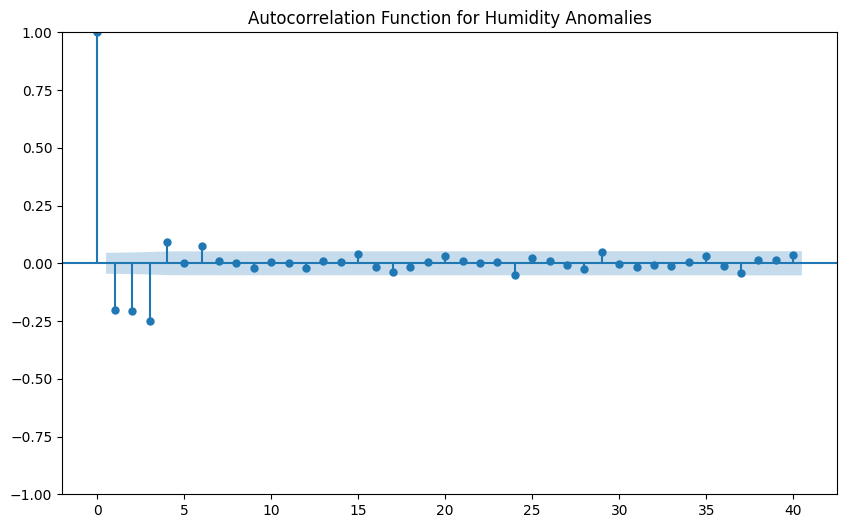

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

# Loading data
df = pd.read_csv('/content/humidity.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)
df = df[['Los Angeles']]
df = df.fillna(method='bfill')
df = df.resample('D').bfill()

# Seasonal decomposition
result_add = seasonal_decompose(df['Los Angeles'], model='additive', extrapolate_trend='freq')
trend = result_add.trend
seasonal = result_add.seasonal
residual = df['Los Angeles'] - trend - seasonal

# First differencing to stabilize the mean
residual = residual.diff().dropna()

# Plotting the Autocorrelation Function
plt.figure()
plot_acf(residual, lags=40)
plt.title('Autocorrelation Function for Humidity Anomalies')
plt.show()


#Forecasting

## The wavy nature of the ACF denotes the complex roots MA part of the time series, this is because of the seasonal part of our Tempurature time series

## The Above ACF is derive after just first differencing of the time series, that can follow nearly MA-3 process, beacuse it has significant AC at lag 0, 2, 3.

## We have done first order diffenecing beacusee it has mean closest to 0, we have tried the 2nd order and 3rd order differencing but 1st order giving us the best near to 0 mean.

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.5 MB/s eta 0:00:00


In [ ]:
print(lv['Los Angeles'])

datetime
2012-10-01    88.0
2012-10-02    88.0
2012-10-03    27.0
2012-10-04    35.0
2012-10-05    50.0
              ... 
2017-11-26    42.0
2017-11-27    72.0
2017-11-28    25.0
2017-11-29    28.0
2017-11-30    56.0
Freq: D, Name: Los Angeles, Length: 1887, dtype: float64


In [ ]:
# To install the library

# Import the library
from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(lv['Los Angeles'], start_p = 1, start_q = 1,
						max_p = 3, max_q = 3, m = 12,
						start_P = 0, seasonal = True,
						d = None, D = 1, trace = True,
						error_action ='ignore', # we don't want to know if an order does not work
						suppress_warnings = True, # we don't want convergence warnings
						stepwise = True)		 # set to stepwise

# To print the summary
stepwise_fit.summary()


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=4.92 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=17461.781, Time=0.13 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=16209.784, Time=4.52 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=8.85 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=17459.852, Time=0.10 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=16673.769, Time=0.44 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=15981.406, Time=9.59 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=36.75 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=14.95 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=16836.408, Time=6.06 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=15976.161, Time=11.96 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=16203.642, Time=5.45 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=40.08 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=17.65 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept  

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1887
Model:             SARIMAX(3, 0, 0)x(2, 1, 0, 12)   Log Likelihood               -7980.733
Date:                            Fri, 10 May 2024   AIC                          15973.466
Time:                                    17:22:08   BIC                          16006.685
Sample:                                10-01-2012   HQIC                         15985.703
                                     - 11-30-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6424      0.021     30.377      0.000       0.601       0.684
ar.L2         -0.0376      0.026     -1.438      0.150      -0.089       0.014
ar.L3         -0.0382      0.022     -1.771      0.077      -0.080       0.004
ar.S.L12      -0.6327      0.021    -29.940      0.000      -0.674      -0.591
ar.S.L24      -0.3403      0.021    -16.490      0.000      -0.381      -0.300
sigma2       290.4648      7.919     36.677      0.000     274.943     305.987
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               118.63
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.25
Prob(H) (two-sided):                  0.62   Kurtosis:                         4.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## TEMPREATURE.CSV


In [ ]:
import pandas as pd

df = pd.read_csv('/content/temperature.csv')
lv = df[['datetime', 'Los Angeles']]
lv = lv.fillna(method='bfill')
lv['datetime'] = pd.to_datetime(lv['datetime'])
lv.set_index('datetime', inplace=True)
# Import the library
from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(lv['Los Angeles'], start_p = 1, start_q = 1,
						max_p = 3, max_q = 3, m = 12,
						start_P = 0, seasonal = True,
						d = None, D = 1, trace = True,
						error_action ='ignore', # we don't want to know if an order does not work
						suppress_warnings = True, # we don't want convergence warnings
						stepwise = True)		 # set to stepwise

# To print the summary
stepwise_fit.summary()


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=140.01 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=315578.862, Time=4.24 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=inf, Time=82.33 sec


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMAX model
model = SARIMAX(lv['Los Angeles'], order=(3, 0, 0), seasonal_order=(2, 1, 0, 12))
results = model.fit()

# Print model summary
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                        Los Angeles   No. Observations:                 1887
Model:             SARIMAX(3, 0, 0)x(2, 1, 0, 12)   Log Likelihood               -4579.407
Date:                            Fri, 10 May 2024   AIC                           9170.815
Time:                                    17:28:41   BIC                           9204.033
Sample:                                10-01-2012   HQIC                          9183.052
                                     - 11-30-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9683      0.020     48.733      0.000       0.929       1.007
ar.L2         -0.2472      0.028   

                                     SARIMAX Results                                      
Dep. Variable:                        Los Angeles   No. Observations:                 1887
Model:             SARIMAX(3, 0, 0)x(2, 1, 0, 12)   Log Likelihood               -7239.981
Date:                            Fri, 10 May 2024   AIC                          14491.963
Time:                                    17:33:59   BIC                          14525.094
Sample:                                10-01-2012   HQIC                         14504.177
                                     - 11-30-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9270      0.021     43.392      0.000       0.885       0.969
ar.L2         -0.2712      0.027   

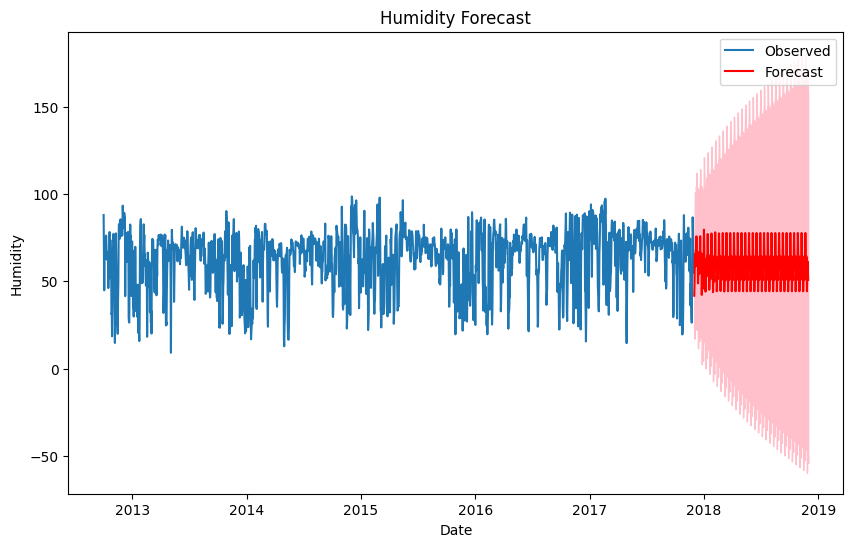

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it has been loaded similarly
# Load your dataset
df = pd.read_csv('humidity.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)
humidity = df['Los Angeles'].resample('D').mean().fillna(method='bfill')

# Fit the SARIMAX model
model = SARIMAX(humidity,
                order=(3, 0, 0),
                seasonal_order=(2, 1, 0, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit()

# Print the summary of the model fit
print(results.summary())

# Forecast for the next 3 years (36 months)
forecast_steps = 365  # Since the data is daily, calculate the number of days in 3 years
forecast = results.get_forecast(steps=forecast_steps)

# Confidence intervals for the forecasts
conf_int = forecast.conf_int()

# Plotting the forecast along with the historical data
plt.figure(figsize=(10, 6))
plt.plot(humidity, label='Observed')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, color='r', label='Forecast')
plt.fill_between(forecast.predicted_mean.index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1], color='pink')
plt.title('Humidity Forecast')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.legend()
plt.show()


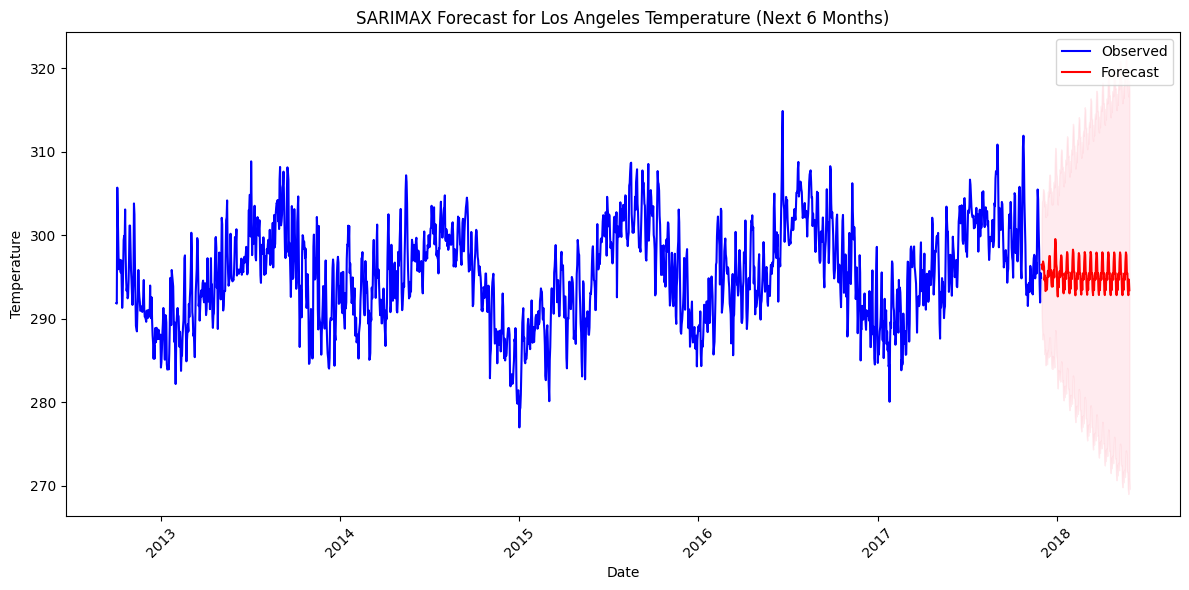

In [ ]:
import numpy as np

# Forecasting for the next 6 months (180 days)
forecast_steps = 180

# Perform forecasting
forecast = results.get_forecast(steps=forecast_steps)

# Get forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Generate date range for the forecasted period
forecast_dates = pd.date_range(start=lv.index[-1], periods=forecast_steps + 1, freq='D')[1:]

# Plot the forecasted values along with the original data
plt.figure(figsize=(12, 6))
plt.plot(lv.index, lv['Los Angeles'], label='Observed', color='blue')
plt.plot(forecast_dates, forecast_values, color='red', label='Forecast')
plt.fill_between(forecast_dates, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.title('SARIMAX Forecast for Los Angeles Temperature (Next 6 Months)')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
